<a href="https://colab.research.google.com/github/MattiaGio/FaceMaskDetection/blob/main/face_mask_detection(1988401%2C_2000572%2C1884283).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is the improved version of our project.<br>**

---


To enhance test accuracy and mitigate overfitting, we have increased the size of the dataset from 7k to 12k. Additionally, we have incorporated data augmentation techniques, which were not utilized in the previous version of our project.


**our project consisting of four parts<br>**


---


1)downloading the dataset<br>
2)image preprocessing<br>
3)training CNN model<br>
4)take an image as input

In [ ]:
!pip install opencv-python-headless
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**1.1)** importing importent libraries

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import cv2 as cv
from google.colab.patches import cv2_imshow

**1.2)** connecting to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**1.3)** it will set Kaggle configure directory to our  Kaggle folder in drive<br>

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = '/content/gdrive/MyDrive/Kaggle'

**1.4)** Now go to Kaggle directory

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


**1.5)** to confirm what is our current directory

In [ ]:
!pwd

/content/gdrive/MyDrive/Kaggle


**1.7)** now let's download the kaggle data
this can be done easily by just copiyng the kaggle command of current dataset.

In [ ]:
! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

100% 330M/330M [00:04<00:00, 80.6MB/s]
100% 330M/330M [00:04<00:00, 77.5MB/s]


**1.8)** the above data is in the zip format so let's unzip it
to do that just go to your google drive, you will see the downloaded data. copy and past the name of the data here

In [ ]:
!unzip face-mask-12k-images-dataset.zip -d faceMask-dataset-12k

Output streaming troncato alle ultime 5000 righe.
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: faceMask-dataset-12k/Face Mask Dataset/Train/W

let's move to our new folder called the faceMask-datase

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle/faceMask-dataset-12k/Face Mask Dataset

/content/gdrive/MyDrive/Kaggle/faceMask-dataset-12k/Face Mask Dataset


**2.1)** set path

In [ ]:
main = '/content/gdrive/MyDrive/Kaggle/faceMask-dataset-12k/Face Mask Dataset'
test = '/content/gdrive/MyDrive/Kaggle/faceMask-dataset-12k/Face Mask Dataset/Test'
train= '/content/gdrive/MyDrive/Kaggle/faceMask-dataset-12k/Face Mask Dataset/Train'
validation = '/content/gdrive/MyDrive/Kaggle/faceMask-dataset-12k/Face Mask Dataset/Validation'

**2.2)** All image preprocessing is performed in this part. In our previous project, we had separate functions for each image preprocessing step. However, thanks to the Keras ImageDataGenerator class, most of the image preprocessing can now be accomplished using just one class. This class also includes data augmentation techniques that enhance the efficiency of our process.

The default values used for the parameters in this section are obtained from the Keras ImageDataGenerator documentation. We will adjust these values if we do not achieve the desired accuracy.<br>

---


**resources** <br>


---


**medium :** https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720 <br>
**keras :** https://keras.io/api/data_loading/image/ <br>
**TensorFlow :** https://www.tensorflow.org/tutorials/images/data_augmentation <br>

In [ ]:
train_augmented = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   horizontal_flip = True,

                                   zoom_range = 0.2
                                   )
test_augmented = ImageDataGenerator(rescale=1./255)
validation_augmented = ImageDataGenerator(rescale=1./255)

training_set = train_augmented.flow_from_directory(train,
                                                    target_size=(150,150),
                                                    batch_size = 16,
                                                    class_mode = 'binary',

                                                    color_mode="grayscale",
                                                    shuffle=True
                                                    )
test_set = test_augmented.flow_from_directory(test,
                                                    target_size=(150,150),
                                                    batch_size = 16,
                                                    class_mode = 'binary',
                                                    color_mode="grayscale",
                                                    shuffle=False
                                                    )
validation_set = validation_augmented.flow_from_directory(validation,
                                                    target_size=(150,150),
                                                    batch_size = 16,
                                                    class_mode = 'binary',
                                                    color_mode="grayscale",
                                                    shuffle=True
                                                    )

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [ ]:
total_training = training_set.classes
print('total number of images in training set are {}'.format(len(total_training)))
total_validation = validation_set.classes
print('total number of images in validation set are {}'.format(len(total_validation)))
total_test = test_set.classes
print('total number of images in test set are {}'.format(len(total_test)))
counter = 0
for i in range(len(total_training)):
  if total_training[i]==0:
    counter+=1
print('the total number of with mask images in training set are {}'.format(counter))
counter = 0
for i in range(len(total_validation)):
  if total_validation[i]==0:
    counter+=1
print('the total number of with mask images in validation set are {}'.format(counter))
counter = 0
for i in range(len(total_test)):
  if total_test[i]==0:
    counter+=1
print('the total number of with mask images in test set are {}'.format(counter))


total number of images in training set are 10000
total number of images in validation set are 800
total number of images in test set are 992
the total number of with mask images in training set are 5000
the total number of with mask images in validation set are 400
the total number of with mask images in test set are 483


**3.1)** Here we improve our CNN architecture, we try differnet layers and by using this architecture we achive our desire accuracy.<br>


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [ ]:
from math import ceil
training_steps = ceil(len(total_training)/16)
print(training_steps)
validation_stp = ceil(len(total_validation)/16)
print(validation_stp)

625
50


In [ ]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(training_set,
                    epochs = 30,
                    steps_per_epoch = training_steps,
                    validation_steps = validation_stp,
                    validation_data = validation_set)

<ipython-input-17-431c9632c993>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/30
625/625 [==============================] - 116s 183ms/step - loss: 0.5346 - accuracy: 0.7446 - val_loss: 0.2107 - val_accuracy: 0.9388
Epoch 2/30
625/625 [==============================] - 110s 176ms/step - loss: 0.2875 - accuracy: 0.9090 - val_loss: 0.1650 - val_accuracy: 0.9613
Epoch 3/30
625/625 [==============================] - 112s 179ms/step - loss: 0.2557 - accuracy: 0.9263 - val_loss: 0.1432 - val_accuracy: 0.9675
Epoch 4/30
625/625 [==============================] - 112s 180ms/step - loss: 0.2388 - accuracy: 0.9388 - val_loss: 0.1404 - val_accuracy: 0.9737
Epoch 5/30
625/625 [==============================] - 111s 177ms/step - loss: 0.2372 - accuracy: 0.9426 - val_loss: 0.1477 - val_accuracy: 0.9725
Epoch 6/30
625/625 [==============================] - 106s 169ms/step - loss: 0.2309 - accuracy: 0.9460 - val_loss: 0.1493 - val_accuracy: 0.9762
Epoch 7/30
625/625 [==============================] - 107s 172ms/step - loss: 0.2199 - accuracy: 0.9533 - val_loss: 0.1395 -

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

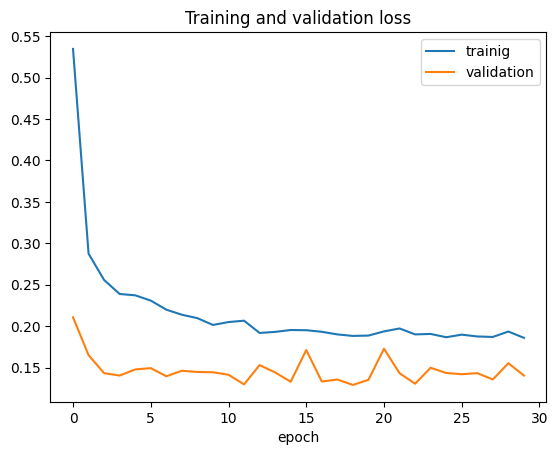

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

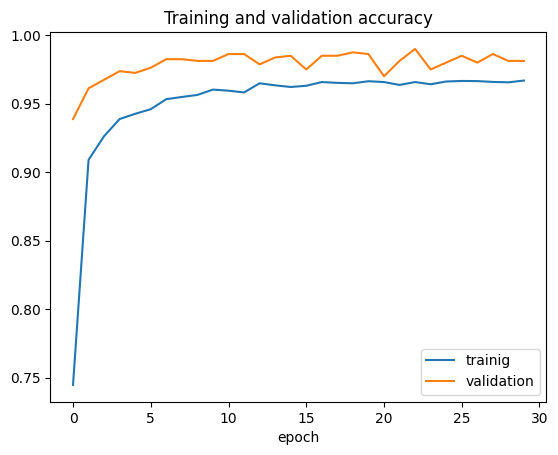

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_set)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

62/62 [==============================] - 4s 56ms/step - loss: 0.1571 - accuracy: 0.9798
test acc :0.9798387289047241 test loss:0.1570701152086258


In [ ]:
model.save('/content/gdrive/MyDrive/Kaggle/face_mask_detection(1988401, 2000572,1884283).h5')

In [ ]:
#haar_cascade = cv.CascadeClassifier(cv.samples.findFile
                                    #(cv.data.haarcascades+"haarcascade_frontalface_default.xml"))

In [ ]:
#face_detect = haar_cascade.detectMultiScale(img)
#for x,y,w,h in face_detect:
 # cv.rectangle(img,(x,y),(x+w,y+h),(255,255,255),thickness = 2)
 # face = img[y:y + h, x:x + w]
#cv2_imshow(img)
#cv2_imshow(face)

**reloading our model to perform predictions**

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Kaggle/face_mask_detection(1988401, 2000572,1884283).h5')

In [ ]:
path = '/content/gdrive/MyDrive/Kaggle/real_test_images/images/'
list_of_images = os.listdir('/content/gdrive/MyDrive/Kaggle/real_test_images/images')
#del list_of_images[-2] # Do not run this line of code if you do not encounter any issues. I encountered an issue because of an unsupported file, so I wrote this line of code to resolve it.
print(list_of_images)

['download.jpg', 'download (1).jpg', 'crop.jpg', 'crop2.jpg', 'images (1).jpg', 'images (2).jpg', 'crop3.jpg', 'mask1.jpg', 'mask2.jpg', 'mask3.jpg', 'mask6.jpg', 'nomask2.jpg', 'nomask23.jpg', 'mask1crp2.jpg', '.ipynb_checkpoints', 'mask77.jpg']


**NOTE** <BR>
Below, we test our model on different images downloaded online. To obtain accurate predictions, we crop and pass only the face region because the dataset used to train our model mainly consists of facial data. Although the model can predict images without cropping, there were one or two instances where the predictions were incorrect. However, after cropping the images and providing only the face region, the model predicts them correctly. To address this issue, we apply a Haar cascade to detect the face and then feed only the detected face region to the model. To simplify the code, we have temporarily commented out the corresponding sections.

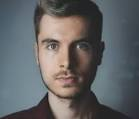

1/1 [==============================] - 0s 328ms/step
0.9999943
nomask



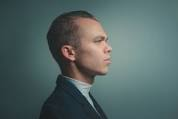

1/1 [==============================] - 0s 29ms/step
0.72825545
nomask



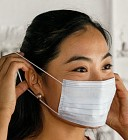

1/1 [==============================] - 0s 29ms/step
0.00050252996
mask



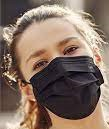

1/1 [==============================] - 0s 30ms/step
0.025135864
mask



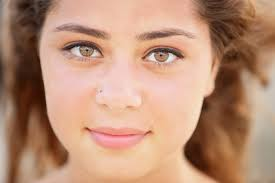

1/1 [==============================] - 0s 29ms/step
0.9794516
nomask



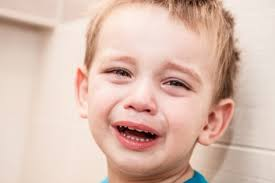

1/1 [==============================] - 0s 29ms/step
0.624719
nomask



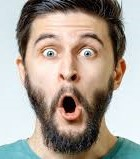

1/1 [==============================] - 0s 28ms/step
0.18111648
mask



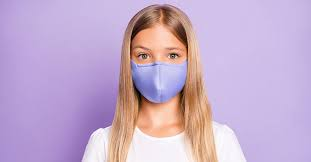

1/1 [==============================] - 0s 28ms/step
0.793507
nomask



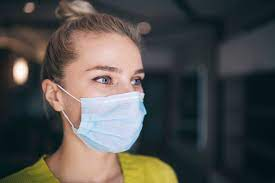

1/1 [==============================] - 0s 28ms/step
0.12154345
mask



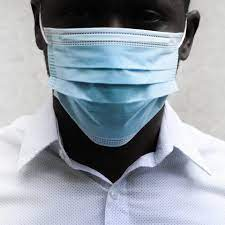

1/1 [==============================] - 0s 29ms/step
0.5342623
mask



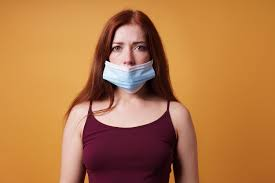

1/1 [==============================] - 0s 28ms/step
0.04944445
mask



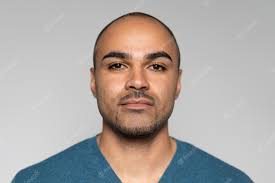

1/1 [==============================] - 0s 32ms/step
0.0751517
mask



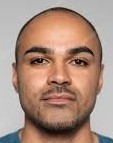

1/1 [==============================] - 0s 28ms/step
0.9990989
nomask



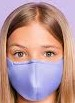

1/1 [==============================] - 0s 27ms/step
0.22773205
mask



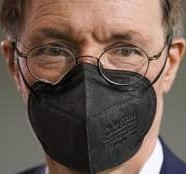

1/1 [==============================] - 0s 32ms/step
0.07296253
mask



In [ ]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
for images in list_of_images:
  if images[-3:] != 'jpg':
    continue
  img = cv.imread(path+images)
  cv2_imshow(img)
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  input_image_resized = cv2.resize(gray_image, (150,150))
  input_image_scaled = input_image_resized/255
  images = image.img_to_array(input_image_scaled)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(prediction[0][0])
  if prediction[0][0]<=0.55:
    print('mask\n')
  else:
    print('nomask\n')